In [14]:
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.cm as cmp
import cmocean as cm

In [15]:
hurricanes= xr.open_dataset("C:\code\climateVis\data\hurricane data\IBTrACS.ALL.v04r01.nc")

c:\Users\Karan\anaconda3\envs\ClimTA\lib\site-packages\xarray\coding\times.py:254: RuntimeWarning: invalid value encountered in cast
  flat_num_dates_ns_int = (flat_num_dates * _NS_PER_TIME_DELTA[delta]).astype(


In [16]:
hurricanes

<xarray.Dataset>
Dimensions:           (storm: 13353, date_time: 360, quadrant: 4)
Coordinates:
    time              (storm, date_time) datetime64[ns] ...
    lat               (storm, date_time) float32 ...
    lon               (storm, date_time) float32 ...
Dimensions without coordinates: storm, date_time, quadrant
Data variables: (12/159)
    numobs            (storm) float32 ...
    sid               (storm) |S13 ...
    season            (storm) float32 ...
    number            (storm) int16 ...
    basin             (storm, date_time) |S2 ...
    subbasin          (storm, date_time) |S2 ...
    ...                ...
    reunion_gust      (storm, date_time) float32 ...
    reunion_gust_per  (storm, date_time) float32 ...
    usa_seahgt        (storm, date_time) float32 ...
    usa_searad        (storm, date_time, quadrant) float32 ...
    storm_speed       (storm, date_time) float32 ...
    storm_dir         (storm, date_time) float32 ...
Attributes: (12/49)
    title:                      IBTrACS - International Best Track Archive fo...
    summary:                    The intent of the IBTrACS project is to overc...
    source:                     The original data are tropical cyclone positi...
    Conventions:                ACDD-1.3
    Conventions_note:           Data are nearly CF-1.7 compliant. The sole is...
    product_version:            v04r01
    ...                         ...
    history:                    Tue Jul  2 06:44:42 2024: ncks --no_abc --cnk...
    license:                    These data may be redistributed and used with...
    featureType:                trajectory
    cdm_data_type:              Trajectory
    comment:                    The tracks of TCs generally look like a traje...
    NCO:                        netCDF Operators version 4.8.1 (Homepage = ht...

In [17]:
np.array(hurricanes["iso_time"][0][0])

array(b'1842-10-25 03:00:00', dtype='|S19')

In [18]:
def get_storm_category(W):
    if W < 34:
        return -1  # Tropical depression
    elif 34 <= W < 64:
        return 0   # Tropical storm
    elif 64 <= W < 83:
        return 1   # Category 1
    elif 83 <= W < 96:
        return 2   # Category 2
    elif 96 <= W < 113:
        return 3   # Category 3
    elif 113 <= W < 137:
        return 4   # Category 4
    else:
        return 5   # Category 5

def get_storm_category_n(W):
    if np.isnan(W):
        return np.nan
    if W < 64:
        return 0   # Tropical storm
    elif 64 <= W < 83:
        return 1   # Category 1
    elif 83 <= W < 96:
        return 2   # Category 2
    elif 96 <= W < 113:
        return 3   # Category 3
    elif 113 <= W < 137:
        return 4   # Category 4
    else:
        return 5   # Category 5

def date_range(start, end, data):
    start_times = pd.to_datetime(np.array(hurricanes["iso_time"][:,0], dtype="str"))
    mask = (start_times>start)&(start_times < end)
    selected_data = data.sel(storm = data["storm"][mask])
    return selected_data


In [5]:
pd.to_datetime(np.array(hurricanes["iso_time"][:,0], dtype="str"))

DatetimeIndex(['1842-10-25 03:00:00', '1845-12-02 03:00:00',
               '1848-01-11 06:00:00', '1848-01-11 06:00:00',
               '1848-01-11 06:00:00', '1848-01-11 06:00:00',
               '1848-02-29 18:00:00', '1848-04-21 06:00:00',
               '1848-04-20 18:00:00', '1851-03-20 18:00:00',
               ...
               '2024-04-10 18:00:00', '2024-05-01 12:00:00',
               '2024-05-16 12:00:00', '2024-05-19 18:00:00',
               '2024-05-24 18:00:00', '2024-05-25 12:00:00',
               '2024-05-31 00:00:00', '2024-06-16 12:00:00',
               '2024-06-24 18:00:00', '2024-06-26 00:00:00'],
              dtype='datetime64[ns]', length=13353, freq=None)

In [30]:
modern_hurricanes = date_range(pd.to_datetime('1990-01-01 03:00:00'), pd.to_datetime('2024-07-26 00:00:00'), hurricanes)
modern_hurricanes

<xarray.Dataset>
Dimensions:           (storm: 3589, date_time: 360, quadrant: 4)
Coordinates:
    time              (storm, date_time) datetime64[ns] ...
    lat               (storm, date_time) float32 ...
    lon               (storm, date_time) float32 ...
Dimensions without coordinates: storm, date_time, quadrant
Data variables: (12/159)
    numobs            (storm) float32 ...
    sid               (storm) |S13 ...
    season            (storm) float32 ...
    number            (storm) int16 ...
    basin             (storm, date_time) |S2 ...
    subbasin          (storm, date_time) |S2 ...
    ...                ...
    reunion_gust      (storm, date_time) float32 ...
    reunion_gust_per  (storm, date_time) float32 ...
    usa_seahgt        (storm, date_time) float32 ...
    usa_searad        (storm, date_time, quadrant) float32 ...
    storm_speed       (storm, date_time) float32 ...
    storm_dir         (storm, date_time) float32 ...
Attributes: (12/49)
    title:                      IBTrACS - International Best Track Archive fo...
    summary:                    The intent of the IBTrACS project is to overc...
    source:                     The original data are tropical cyclone positi...
    Conventions:                ACDD-1.3
    Conventions_note:           Data are nearly CF-1.7 compliant. The sole is...
    product_version:            v04r01
    ...                         ...
    history:                    Tue Jul  2 06:44:42 2024: ncks --no_abc --cnk...
    license:                    These data may be redistributed and used with...
    featureType:                trajectory
    cdm_data_type:              Trajectory
    comment:                    The tracks of TCs generally look like a traje...
    NCO:                        netCDF Operators version 4.8.1 (Homepage = ht...

C:\Users\Karan\AppData\Local\Temp\ipykernel_8904\1956349613.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cmp.get_cmap('turbo')
C:\Users\Karan\AppData\Local\Temp\ipykernel_8904\1956349613.py:10: RuntimeWarning: All-NaN axis encountered
  if np.nanmax(modern_hurricanes["wmo_wind"][i]) >= 96:


159
[ -9.7 -10.  -10.3 -10.6 -10.7 -10.6 -10.4 -10.1  -9.7  -9.4  -9.1  -8.8
  -8.6  -8.4  -8.3  -8.2  -8.   -7.9  -7.7  -7.7  -7.6  -7.6  -7.6  -7.7
  -7.7  -7.8  -7.9  -8.   -8.1  -8.3  -8.4  -8.5  -8.6  -8.7  -8.8  -8.9
  -9.1  -9.2  -9.4  -9.7  -9.9 -10.1 -10.3 -10.5 -10.8 -11.1 -11.5 -12.
 -12.4 -12.7 -12.9 -13.3 -13.6 -13.8 -14.  -14.3 -14.6 -15.1 -15.6 -16.
 -16.6 -17.1 -17.7 -18.4 -19.  -19.4 -19.8 -20.3 -20.7 -21.2 -21.7 -22.2
 -22.6 -23.  -23.4 -23.8 -24.2 -24.7 -25.1 -25.5 -25.8 -26.2 -26.6 -27.
 -27.4 -27.8 -28.1 -28.5 -28.9 -29.3 -29.7 -30.  -30.3 -30.6 -30.9 -31.
 -31.2 -31.2 -31.4 -31.5 -31.6 -31.9 -31.9 -31.7 -31.5 -31.4 -31.4 -31.5
 -31.7 -31.9 -32.    nan   nan   nan   nan   nan   nan   nan   nan   nan
   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan
   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan
   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan
   nan   nan   nan   nan   nan   nan   nan   nan   

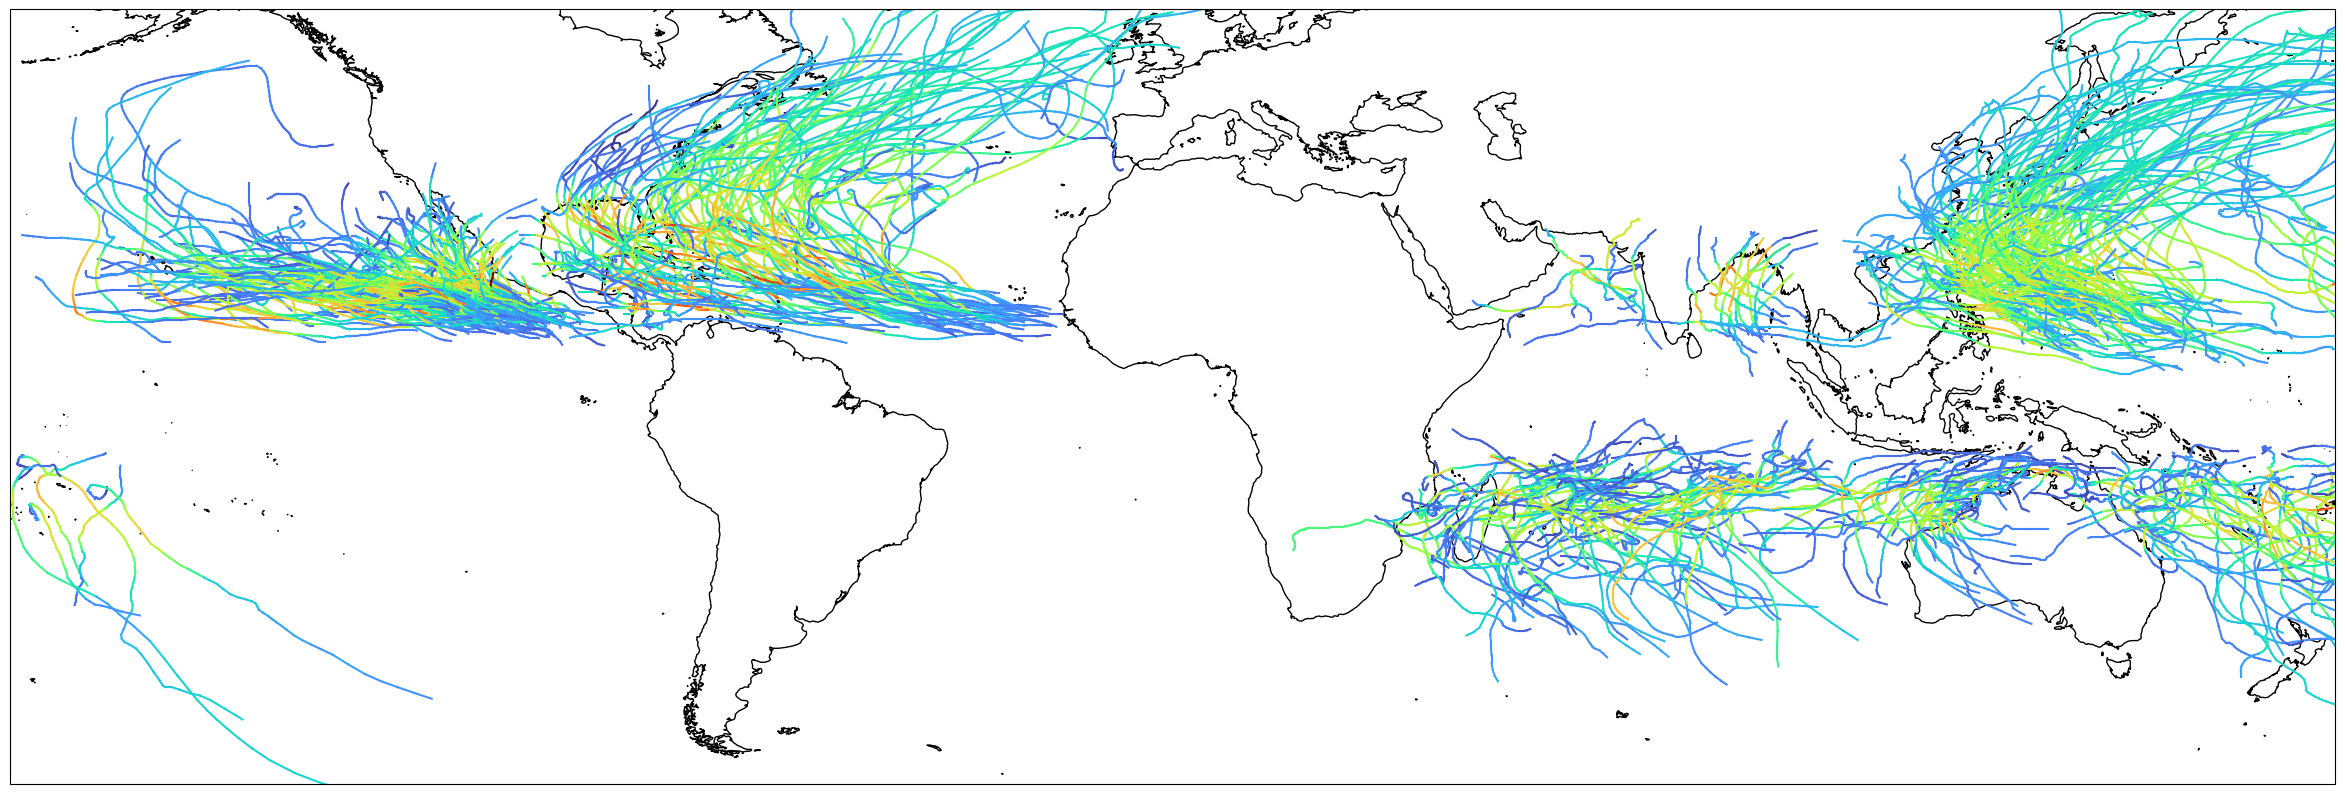

In [31]:
ax = plt.axes(projection=ccrs.PlateCarree())
plt.rcParams["figure.figsize"] = (30,15)
cmap = cmp.get_cmap('turbo')
year_index = 43
print(len(modern_hurricanes))
for i in range(len(modern_hurricanes["storm"])):
    track_lons = np.array(modern_hurricanes["lon"][i])
    track_lats = np.array(modern_hurricanes["lat"][i])

    if np.nanmax(modern_hurricanes["wmo_wind"][i]) >= 96:
        print(track_lats)
        colors = modern_hurricanes["wmo_wind"][i]/np.nanmax(modern_hurricanes["wmo_wind"])
        colors = np.array(colors)
        prev_color = colors[0]
        print(colors[:10])
        for j in range(len(colors)):
            if np.isnan(colors[j]):
                print("hi")
                colors[j] = prev_color
            prev_color = colors[j]
        #print(colors[:10])
        plot_var_col(track_lons, track_lats,colors = cmap(colors))
    #plt.plot(np.array(modern_hurricanes["lon"][i]), np.array(modern_hurricanes["lat"][i]), color = "blue")
ax.coastlines(resolution='50m')
ax.set_extent([-180,180, -60,60])

In [120]:
# list(np.array(modern_hurricanes["name"], dtype="str"))

In [7]:
print(np.array(modern_hurricanes["lat"][0]))

[-12.7 -12.8 -12.8 -12.9 -12.9 -12.9 -13.  -13.1 -13.2 -13.3 -13.4 -13.6
 -13.8 -13.9 -14.  -14.1 -14.3 -14.4 -14.6 -14.8 -15.  -15.1 -15.2 -15.2
 -15.2 -15.2 -15.1 -15.  -14.9 -14.7 -14.4 -14.2 -14.  -13.7 -13.5 -13.4
 -13.2 -12.8 -12.3 -11.9 -11.6 -11.2 -10.8 -10.4 -10.   -9.8  -9.8  -9.9
 -10.  -10.1 -10.3 -10.4 -10.5 -10.6 -10.8 -10.9 -11.  -11.  -11.1 -11.2
 -11.3 -11.5 -11.8 -12.  -12.3 -12.6 -12.9 -13.2 -13.4 -13.7 -13.9 -14.1
 -14.4 -14.7 -14.9 -15.2 -15.4 -15.6 -15.8 -16.1 -16.4 -16.6 -16.6 -16.5
 -16.3 -16.2 -16.  -15.8 -15.6 -15.4 -15.2 -14.8 -14.4 -14.1 -13.8 -13.5
 -13.2 -12.9 -12.6 -12.3 -12.  -11.6 -11.2   nan   nan   nan   nan   nan
   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan
   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan
   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan
   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan
   nan   nan   nan   nan   nan   nan   nan   nan   

In [122]:
np.nanmax(modern_hurricanes["wmo_wind"])

185.0

In [19]:
from cartopy import config
import cartopy.crs as ccrs
import cartopy.feature as cfeature


In [20]:
def plot_var_col(x, y, colors):
    param_list = []
    for i in range(len(x) - 1):
        lnseg = plt.plot(x[i:i+2], y[i:i+2], color=colors[i])
        param_list.append(lnseg)
    return param_list
# def plot_var_col(x, y, colors, alphas):
#     param_list = []
#     for i in range(0, len(x)- 1):
#         lnseg = plt.plot(x[i:i+2], y[i:i + 2], color = colors[i], alpha = alphas[i])
#         param_list.append(lnseg)
#     return param_list

C:\Users\Karan\AppData\Local\Temp\ipykernel_24488\3891355878.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cmp.get_cmap('turbo')
C:\Users\Karan\AppData\Local\Temp\ipykernel_24488\3891355878.py:7: RuntimeWarning: All-NaN axis encountered
  if np.nanmax(modern_hurricanes["wmo_wind"][i]) >= 0:


KeyboardInterrupt: 

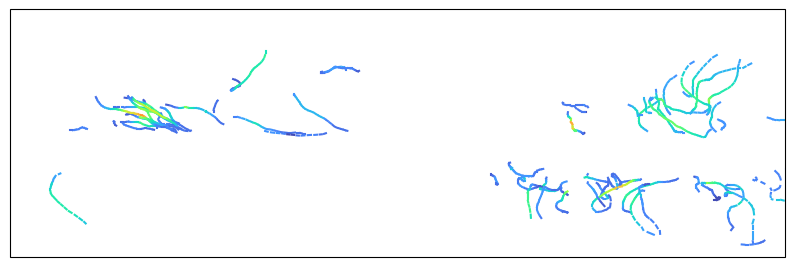

In [21]:
ax = plt.axes(projection=ccrs.PlateCarree())
plt.rcParams["figure.figsize"] = (30,15)
cmap = cmp.get_cmap('turbo')
for i in range(len(modern_hurricanes["storm"])):
    track_lons = np.array(modern_hurricanes["lon"][i])
    track_lats = np.array(modern_hurricanes["lat"][i])
    if np.nanmax(modern_hurricanes["wmo_wind"][i]) >= 0:
        plot_var_col(track_lons, track_lats, colors = cmap(modern_hurricanes["wmo_wind"][i]/np.nanmax(modern_hurricanes["wmo_wind"])))
    #plt.plot(np.array(modern_hurricanes["lon"][i]), np.array(modern_hurricanes["lat"][i]), color = "blue")
ax.coastlines(resolution='50m')
# ax.add_feature(cfeature.STATES.with_scale('10m'),
#             linestyle='--', alpha=.1)
# ax.add_feature(cfeature.BORDERS.with_scale('10m'),
#             linestyle='-', alpha=.3)
#gl = ax.gridlines(draw_labels=True)
#plt.savefig("globe.png", transparent = True)
ax.set_extent([-180,180, -60,60])

C:\Users\Karan\AppData\Local\Temp\ipykernel_5224\772419870.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cmp.get_cmap('turbo')
C:\Users\Karan\AppData\Local\Temp\ipykernel_5224\772419870.py:7: RuntimeWarning: All-NaN axis encountered
  if np.nanmax(modern_hurricanes["wmo_wind"][i]) >= 96:


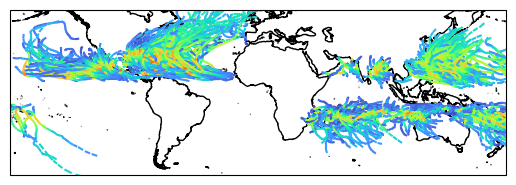

In [10]:
ax = plt.axes(projection=ccrs.PlateCarree())
plt.rcParams["figure.figsize"] = (30,15)
cmap = cmp.get_cmap('turbo')
for i in range(len(modern_hurricanes["storm"])):
    track_lons = np.array(modern_hurricanes["lon"][i])
    track_lats = np.array(modern_hurricanes["lat"][i])
    if np.nanmax(modern_hurricanes["wmo_wind"][i]) >= 96:
        plot_var_col(track_lons, track_lats, colors = cmap(modern_hurricanes["wmo_wind"][i]/np.nanmax(modern_hurricanes["wmo_wind"])))
    #plt.plot(np.array(modern_hurricanes["lon"][i]), np.array(modern_hurricanes["lat"][i]), color = "blue")
ax.coastlines(resolution='50m')
# ax.add_feature(cfeature.STATES.with_scale('10m'),
#             linestyle='--', alpha=.1)
# ax.add_feature(cfeature.BORDERS.with_scale('10m'),
#             linestyle='-', alpha=.3)
#gl = ax.gridlines(draw_labels=True)
#plt.savefig("globe.png", transparent = True)
ax.set_extent([-180,180, -60,60])

C:\Users\Karan\AppData\Local\Temp\ipykernel_5056\3839836521.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cmp.get_cmap('turbo')
C:\Users\Karan\AppData\Local\Temp\ipykernel_5056\3839836521.py:8: RuntimeWarning: All-NaN axis encountered
  if np.nanmax(modern_hurricanes["wmo_wind"][i]) >= 96:


[-12.7 -12.8 -12.8 -12.9 -12.9 -12.9 -13.  -13.1 -13.2 -13.3 -13.4 -13.6
 -13.8 -13.9 -14.  -14.1 -14.3 -14.4 -14.6 -14.8 -15.  -15.1 -15.2 -15.2
 -15.2 -15.2 -15.1 -15.  -14.9 -14.7 -14.4 -14.2 -14.  -13.7 -13.5 -13.4
 -13.2 -12.8 -12.3 -11.9 -11.6 -11.2 -10.8 -10.4 -10.   -9.8  -9.8  -9.9
 -10.  -10.1 -10.3 -10.4 -10.5 -10.6 -10.8 -10.9 -11.  -11.  -11.1 -11.2
 -11.3 -11.5 -11.8 -12.  -12.3 -12.6 -12.9 -13.2 -13.4 -13.7 -13.9 -14.1
 -14.4 -14.7 -14.9 -15.2 -15.4 -15.6 -15.8 -16.1 -16.4 -16.6 -16.6 -16.5
 -16.3 -16.2 -16.  -15.8 -15.6 -15.4 -15.2 -14.8 -14.4 -14.1 -13.8 -13.5
 -13.2 -12.9 -12.6 -12.3 -12.  -11.6 -11.2   nan   nan   nan   nan   nan
   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan
   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan
   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan
   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan
   nan   nan   nan   nan   nan   nan   nan   nan   

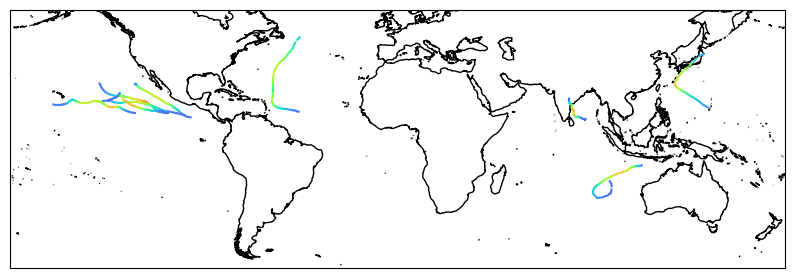

In [203]:
ax = plt.axes(projection=ccrs.PlateCarree())
plt.rcParams["figure.figsize"] = (30,15)
cmap = cmp.get_cmap('turbo')
for i in range(100):
    track_lons = np.array(modern_hurricanes["lon"][i])
    track_lats = np.array(modern_hurricanes["lat"][i])
    print(track_lats)
    if np.nanmax(modern_hurricanes["wmo_wind"][i]) >= 96:
        plot_var_col(track_lons, track_lats, colors = cmap(modern_hurricanes["wmo_wind"][i]/np.nanmax(modern_hurricanes["wmo_wind"])))
    #plt.plot(np.array(modern_hurricanes["lon"][i]), np.array(modern_hurricanes["lat"][i]), color = "blue")
ax.coastlines(resolution='50m')
# ax.add_feature(cfeature.STATES.with_scale('10m'),
#             linestyle='--', alpha=.1)
# ax.add_feature(cfeature.BORDERS.with_scale('10m'),
#             linestyle='-', alpha=.3)
#gl = ax.gridlines(draw_labels=True)
#plt.savefig("globe.png", transparent = True)
ax.set_extent([-180,180, -60,60])

C:\Users\Karan\AppData\Local\Temp\ipykernel_34808\2012237960.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cmp.get_cmap('turbo')


NameError: name 'modern_hurricanes' is not defined

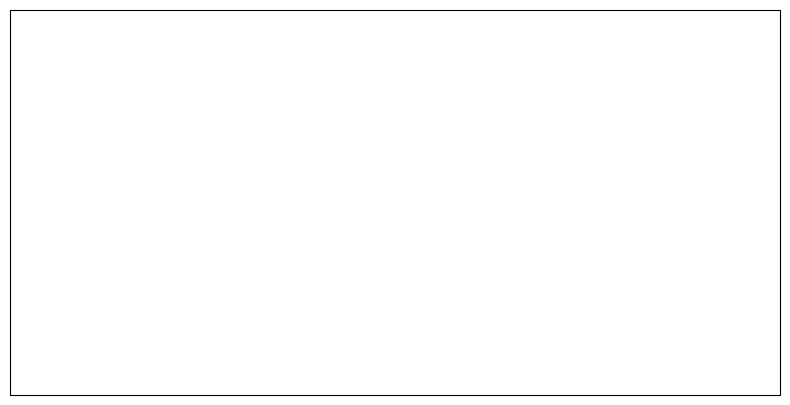

In [20]:


# Assuming modern_hurricanes is your xarray dataset
# Replace `modern_hurricanes` with the actual dataset variable

ax = plt.axes(projection=ccrs.PlateCarree())
plt.rcParams["figure.figsize"] = (30, 15)
cmap = cmp.get_cmap('turbo')

for i in range(len(modern_hurricanes["storm"])):
    track_lons = np.array(modern_hurricanes["lon"][i])
    track_lats = np.array(modern_hurricanes["lat"][i])
    wind_speeds = np.array(modern_hurricanes["wmo_wind"][i])
    
    # If there are padding NaNs at the end, they shouldn't affect the plotting of continuous segments.
    if np.nanmax(wind_speeds) >= 96:
        normalized_wind = wind_speeds / np.nanmax(wind_speeds)
        colors = cmap(normalized_wind)
        plot_var_col(track_lons, track_lats, colors=colors)

# Add coastlines and other features
ax.coastlines(resolution='50m')


plt.title('Hurricane Paths with Varying Intensities')
plt.show()


In [21]:
start_year = 1900
end_year = 2025 #python rules
annual_hurricane_list = []
for year in range(start_year, end_year):
    annual_data = date_range(pd.to_datetime(str(year) + '-01-01'), pd.to_datetime(str(year) + '-12-31'), hurricanes)
    annual_hurricane_list.append(annual_data)


In [99]:
len(annual_hurricane_list)

125

In [100]:
annual_hurricane_list[0]

<xarray.Dataset>
Dimensions:           (storm: 42, date_time: 360, quadrant: 4)
Coordinates:
    time              (storm, date_time) datetime64[ns] ...
    lat               (storm, date_time) float32 ...
    lon               (storm, date_time) float32 ...
Dimensions without coordinates: storm, date_time, quadrant
Data variables: (12/159)
    numobs            (storm) float32 ...
    sid               (storm) |S13 ...
    season            (storm) float32 ...
    number            (storm) int16 ...
    basin             (storm, date_time) |S2 ...
    subbasin          (storm, date_time) |S2 ...
    ...                ...
    reunion_gust      (storm, date_time) float32 ...
    reunion_gust_per  (storm, date_time) float32 ...
    usa_seahgt        (storm, date_time) float32 ...
    usa_searad        (storm, date_time, quadrant) float32 ...
    storm_speed       (storm, date_time) float32 ...
    storm_dir         (storm, date_time) float32 ...
Attributes: (12/49)
    title:                      IBTrACS - International Best Track Archive fo...
    summary:                    The intent of the IBTrACS project is to overc...
    source:                     The original data are tropical cyclone positi...
    Conventions:                ACDD-1.3
    Conventions_note:           Data are nearly CF-1.7 compliant. The sole is...
    product_version:            v04r01
    ...                         ...
    history:                    Sun Jun 30 05:48:27 2024: ncks --no_abc --cnk...
    license:                    These data may be redistributed and used with...
    featureType:                trajectory
    cdm_data_type:              Trajectory
    comment:                    The tracks of TCs generally look like a traje...
    NCO:                        netCDF Operators version 4.8.1 (Homepage = ht...

In [22]:
category_count = []
for item in annual_hurricane_list:
    #basin select

    # basin_mask = np.array(item["basin"][:,0], dtype="str") == "EP"
    # max_windspeed = list(map(get_storm_category, list(np.nanmax(item["wmo_wind"], axis = 1)[basin_mask])))

    max_windspeed = list(map(get_storm_category, list(np.nanmax(item["wmo_wind"], axis = 1))))
    print(len(max_windspeed))
    category_count.append(np.unique(max_windspeed, return_counts=True))

42
51
56
61
46
56
57
67
55
66
57
72
71
62
43
54
74
54
67
52
57
73
63
77
56
66
63
72
70
71
63
64
77
80
87
74
69
65
70
87
82
72
71
84
87
87
81
96
91
102
113
93
101
83
98
95
118
83
114
108
98
124
107
119
125
123
130
143
128
119
151
141
122
127
133
134
115
102
122
105
109
110
116
99
118
123
111
103
110
130
117
99
123
99
115
95
123
107
107
103
111
106
97
105
103
115
99
94
99
100
88
95
94
101
89
112
96
108
116
109
121
105
112
88
29


C:\Users\Karan\AppData\Local\Temp\ipykernel_8904\1375026391.py:8: RuntimeWarning: All-NaN axis encountered
  max_windspeed = list(map(get_storm_category, list(np.nanmax(item["wmo_wind"], axis = 1))))


In [ ]:
category_count = np.array(category_count)

In [77]:
print(category_count)

[(array([-1,  0,  1,  2,  3,  5]), array([7, 2, 4, 3, 1, 1], dtype=int64)), (array([-1,  0,  1,  2,  3,  4]), array([10,  5,  3,  1,  2,  1], dtype=int64)), (array([-1,  0,  1,  4]), array([2, 4, 1, 1], dtype=int64)), (array([-1,  0,  1,  3]), array([2, 1, 2, 1], dtype=int64)), (array([-1,  0,  1,  2,  4]), array([7, 8, 3, 1, 1], dtype=int64)), (array([-1,  0,  1,  3,  4]), array([3, 4, 4, 2, 1], dtype=int64)), (array([-1,  0,  1,  2]), array([4, 2, 3, 1], dtype=int64)), (array([-1,  0,  1,  3]), array([7, 4, 2, 1], dtype=int64)), (array([-1,  0,  1,  4,  5]), array([7, 6, 3, 2, 1], dtype=int64)), (array([-1,  0,  1,  2,  4,  5]), array([4, 4, 3, 2, 1, 1], dtype=int64)), (array([-1,  0,  1,  2,  3]), array([2, 6, 5, 2, 1], dtype=int64)), (array([-1,  0,  1,  2,  3,  4]), array([4, 4, 1, 1, 1, 1], dtype=int64)), (array([-1,  0,  1,  2,  5]), array([3, 3, 1, 2, 1], dtype=int64)), (array([-1,  0,  1,  2,  3]), array([1, 5, 2, 1, 1], dtype=int64)), (array([-1,  0,  1,  2]), array([5, 4, 2,

(array([0, 1, 2, 3], dtype=int64),)

In [23]:
cat345_storms = []
for i in [-1,0,1,2,3,4,5]:
    cat_storms = []
    for item in category_count:
        arg = np.where(item[0] == i)[0]
        if len(arg) >0:
            cat_storms.append(item[1][arg[0]])
        else:
            cat_storms.append(0)
    cat345_storms.append(cat_storms)

In [24]:
cat345_storms = np.array(cat345_storms)

In [25]:
ONI = pd.read_csv("C:\code\climateVis\data\El Nino\oni_ascii.csv")

In [11]:
ONI

SEAS    YR  TOTAL  ANOM
0    DJF  1950  24.72 -1.53
1    JFM  1950  25.17 -1.34
2    FMA  1950  25.75 -1.16
3    MAM  1950  26.12 -1.18
4    AMJ  1950  26.32 -1.07
..   ...   ...    ...   ...
886  OND  2023  28.60  1.92
887  NDJ  2023  28.57  1.95
888  DJF  2024  28.43  1.79
889  JFM  2024  28.36  1.49
890  FMA  2024  28.44  1.15

[891 rows x 4 columns]

In [26]:
DateRangeONI = pd.date_range("1950-01-01", "2024-04-01", freq="M")
DateRangehurr = pd.date_range("1899-01-01", "2024-01-01", freq="Y")

In [37]:
DateRangeONI

DatetimeIndex(['1950-01-31', '1950-02-28', '1950-03-31', '1950-04-30',
               '1950-05-31', '1950-06-30', '1950-07-31', '1950-08-31',
               '1950-09-30', '1950-10-31',
               ...
               '2023-06-30', '2023-07-31', '2023-08-31', '2023-09-30',
               '2023-10-31', '2023-11-30', '2023-12-31', '2024-01-31',
               '2024-02-29', '2024-03-31'],
              dtype='datetime64[ns]', length=891, freq='M')

(3652.0, 20089.0)

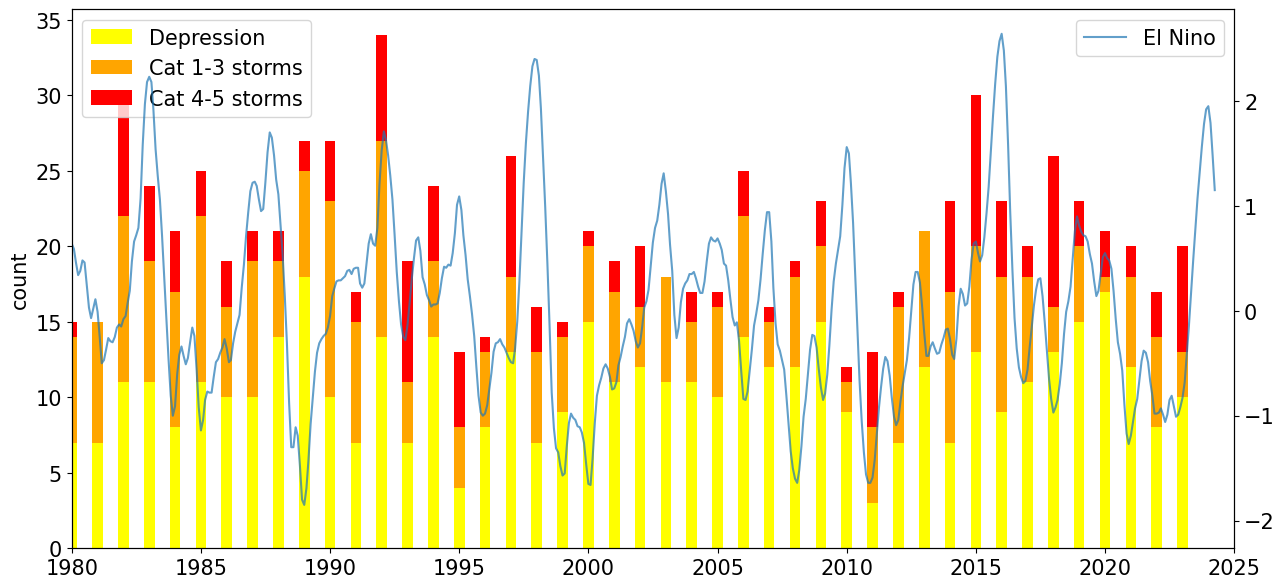

In [13]:
plt.rcParams["figure.figsize"] = (15, 7)
font = {'family' : 'sans-serif',
        'weight' : 'medium',
        'size'   : 15}
plt.rc('font', **font)
fig, ax = plt.subplots()
ax2 = ax.twinx()
bottom = np.zeros(len(cat345_storms[0]))
ax2.plot(DateRangeONI,ONI["ANOM"], alpha = 0.7, label = "El Nino")
ax.bar(DateRangehurr, np.nansum(cat345_storms[0:2], axis = 0),150, bottom = bottom, color = "yellow", label = "Depression")
bottom += np.nansum(cat345_storms[0:2], axis = 0)
ax.bar(DateRangehurr, np.nansum(cat345_storms[2:5], axis = 0),150, bottom = bottom, color = "orange", label = "Cat 1-3 storms")
bottom += np.nansum(cat345_storms[2:5], axis = 0)
ax.bar(DateRangehurr, np.nansum(cat345_storms[5:7], axis = 0),150, bottom = bottom, color = "red", label = "Cat 4-5 storms")
ax.set_ylabel("count")
ax.legend(loc = 2)
ax2.legend()
plt.xlim(pd.to_datetime("1980-01-01"), pd.to_datetime("2025-01-01"))

In [42]:
print(time_array)
print(pd.date_range("2023-12-16", "2024-01-15", freq="D"))

DatetimeIndex(['2022-12-24 06:00:00', '2022-12-24 09:00:00',
               '2022-12-24 12:00:00', '2022-12-24 15:00:00',
               '2022-12-24 18:00:00', '2022-12-24 21:00:00',
               '2022-12-25 00:00:00', '2022-12-25 03:00:00',
               '2022-12-25 06:00:00', '2022-12-25 09:00:00',
               ...
                               'NaT',                 'NaT',
                               'NaT',                 'NaT',
                               'NaT',                 'NaT',
                               'NaT',                 'NaT',
                               'NaT',                 'NaT'],
              dtype='datetime64[ns]', length=360, freq=None)
DatetimeIndex(['2023-12-16', '2023-12-17', '2023-12-18', '2023-12-19',
               '2023-12-20', '2023-12-21', '2023-12-22', '2023-12-23',
               '2023-12-24', '2023-12-25', '2023-12-26', '2023-12-27',
               '2023-12-28', '2023-12-29', '2023-12-30', '2023-12-31',
               '2024-01-0

In [68]:
(time_array[~np.isnan(wind_speed_data)] - time_array[0]).days

Index([0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4], dtype='int64')

In [27]:
def nan_helper(y):
    """Helper to handle indices and logical indices of NaNs.

    Input:
        - y, 1d numpy array with possible NaNs
    Output:
        - nans, logical indices of NaNs
        - index, a function, with signature indices= index(logical_indices),
          to convert logical indices of NaNs to 'equivalent' indices
    Example:
        >>> # linear interpolation of NaNs
        >>> nans, x= nan_helper(y)
        >>> y[nans]= np.interp(x(nans), x(~nans), y[~nans])
    """

    return np.isnan(y), lambda z: z.nonzero()[0]
def intensification_calc(winds):
    nans,x = nan_helper(winds)
    winds[nans] = np.interp(x(nans), x(~nans), winds[~nans])
    windchange_24h = []
    for i in range(0, len(winds) - 8):
        windchange_24h.append(winds[i + 8] - winds[i])
    return np.array(windchange_24h)

C:\Users\Karan\AppData\Local\Temp\ipykernel_24488\3374881322.py:8: RuntimeWarning: All-NaN axis encountered
  storm_category = get_storm_category_n(np.nanmax(wind_speed_data))
C:\Users\Karan\AppData\Local\Temp\ipykernel_24488\3374881322.py:8: RuntimeWarning: All-NaN axis encountered
  storm_category = get_storm_category_n(np.nanmax(wind_speed_data))
C:\Users\Karan\AppData\Local\Temp\ipykernel_24488\3374881322.py:8: RuntimeWarning: All-NaN axis encountered
  storm_category = get_storm_category_n(np.nanmax(wind_speed_data))
C:\Users\Karan\AppData\Local\Temp\ipykernel_24488\3374881322.py:8: RuntimeWarning: All-NaN axis encountered
  storm_category = get_storm_category_n(np.nanmax(wind_speed_data))
C:\Users\Karan\AppData\Local\Temp\ipykernel_24488\3374881322.py:8: RuntimeWarning: All-NaN axis encountered
  storm_category = get_storm_category_n(np.nanmax(wind_speed_data))
C:\Users\Karan\AppData\Local\Temp\ipykernel_24488\3374881322.py:8: RuntimeWarning: All-NaN axis encountered
  storm_cate

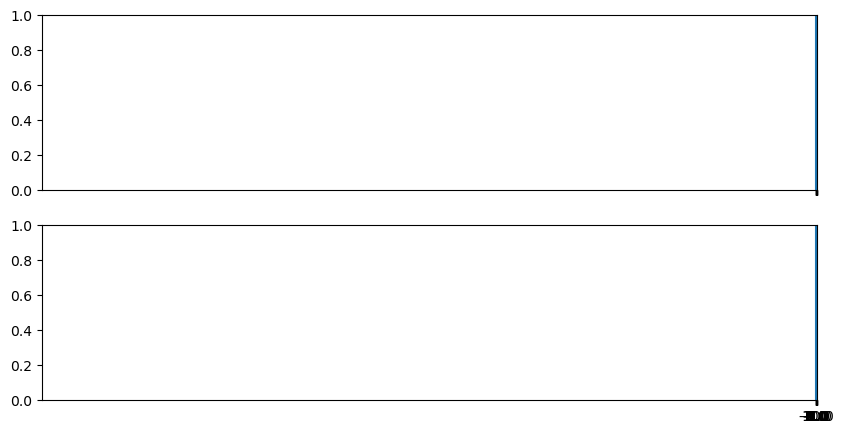

In [17]:
import matplotlib.dates as mdates
plt.rcParams["figure.figsize"] = (10, 5)
year_index = 44
fig, ax = plt.subplots(2,1, sharex= True)

for i in range(len(annual_hurricane_list[year_index]["storm"])):
    wind_speed_data = annual_hurricane_list[year_index]["wmo_wind"][i]
    storm_category = get_storm_category_n(np.nanmax(wind_speed_data))
    time_array = pd.to_datetime(np.array(annual_hurricane_list[year_index]["iso_time"][i], dtype="str"))
    if(storm_category >3):
        storm_maxima = np.nanargmax(wind_speed_data)
        ax[0].plot((time_array[~np.isnan(wind_speed_data)] - time_array[storm_maxima]) + pd.to_datetime("2024-01-01"),
                 wind_speed_data[~np.isnan(wind_speed_data)],
                 color = cmap(storm_category/5), alpha = 0.5)
        ax[1].plot((time_array[4:len(time_array) - 4] - time_array[storm_maxima]) + pd.to_datetime("2024-01-01"), intensification_calc(np.array(wind_speed_data)))
        
ax[0].set_xticks(pd.date_range("2023-12-22", "2024-01-11", freq="D"), np.linspace(-10,10,21))
ax[0].axvline(pd.to_datetime("2024-01-01"))  
ax[1].set_xticks(pd.date_range("2023-12-22", "2024-01-11", freq="D"), np.linspace(-10,10,21))
ax[1].axvline(pd.to_datetime("2024-01-01"))    


In [109]:
all(np.isnan([np.nan,np.nan,np.nan]))

True

In [33]:
import scipy as sp

In [36]:
len(annual_hurricane_list)

125

0
int40.0
1
2
3
4
5
6
int10.0
7
8
9
10
int40.0
11


C:\Users\Karan\AppData\Local\Temp\ipykernel_8904\4027871937.py:27: RuntimeWarning: Mean of empty slice
  intensification_climatology.append(np.nanmean(yearly_intensifications))
C:\Users\Karan\AppData\Local\Temp\ipykernel_8904\4027871937.py:28: RuntimeWarning: Mean of empty slice
  plt.scatter(year_index+ 1900, np.nanmean(yearly_intensifications), color = "black")


12
13
14
15
int25.0
int35.0
16
int25.0
17
int30.0
18
19
int35.0
20
21
int40.0
22
23
24
int45.0
25
26
int40.0
int20.0
int25.0
int45.0
27
28
int35.0
29
int40.0
30
int35.0
31
int40.0
32
int70.0
int30.0
int55.0
int40.0
33
int30.0
int40.0
int20.0
int35.0
int40.0
34
35
int30.0
int70.0
int20.0
36
37
38
int25.0
39
int40.0
40
41
int35.0
42
43
int20.0
44
int30.0
int40.0
45
int25.0
46
47
int35.0
48
int45.0
int45.0
49
int35.0
50
int35.0
int20.0
int50.0
51
int35.0
int30.0
52
int55.0
53
int40.0
54
int30.0
55
int35.0
int40.0
int40.0
56
57
int25.0
int95.0
58
int45.0
int30.0
int45.0
59
int60.0
int0.0
int35.0
int25.0
60
int30.0
61
int35.0
int30.0
int40.0
int40.0
int45.0
62
63
int45.0
64
int45.0
int25.0
int40.0
int45.0
65
int50.0
66
int40.0
67
int45.0
68
69
int60.0
70
int45.0
71
int40.0
int65.0
72
int25.0
73
int40.0
int45.0
int55.0
74
int50.0
int45.0
75
int30.0
int45.0
int35.0
int40.0
int15.0
76
int35.0
int45.0
int35.0
int40.0
77
int65.0
78
int40.0
int50.0
int50.0
int50.0
int50.0
int30.0
int20.0
int40.0


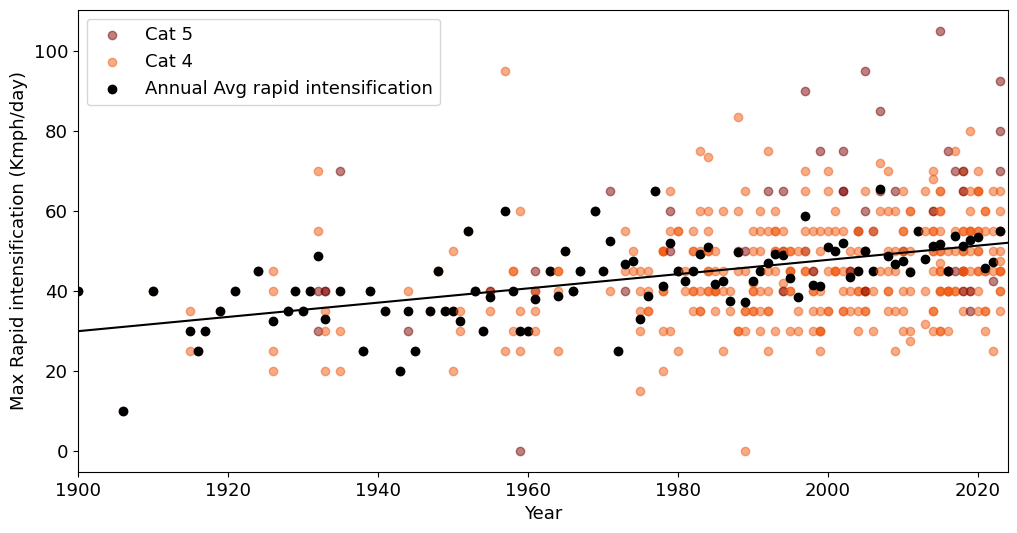

In [45]:
import matplotlib.dates as mdates
plt.rcParams["figure.figsize"] = (12, 6)

font = {'family' : 'sans-serif',
        'weight' : 'medium',
        'size'   : 13}
plt.rc('font', **font)
intensification_climatology = []
datalength = 125
for year_index in range(datalength):
    print(year_index)
    yearly_intensifications = []
    for i in range(len(annual_hurricane_list[year_index]["storm"])):
        wind_speed_data = np.array(annual_hurricane_list[year_index]["wmo_wind"][i])
        if all(np.isnan(wind_speed_data)) == False:
            storm_category = get_storm_category_n(np.nanmax(wind_speed_data))
            if(storm_category >3):
                storm_maxima = np.nanargmax(wind_speed_data)
                # ax.plot((time_array[~np.isnan(wind_speed_data)] - time_array[storm_maxima]) + pd.to_datetime("2024-01-01"),
                #          wind_speed_data[~np.isnan(wind_speed_data)],
                #          color = cmap(storm_category/5), alpha = 0.5)
                # ax.plot((time_array[4:len(time_array) - 4] - time_array[storm_maxima]) + pd.to_datetime("2024-01-01"), intensification_calc(np.array(wind_speed_data)))
                max_intensification = np.nanmax(intensification_calc(np.array(wind_speed_data)))
                print("int" + str(max_intensification))
                yearly_intensifications.append(max_intensification)
                plt.scatter(year_index + 1900,max_intensification, color = cmap(storm_category/5), alpha = 0.5)
    intensification_climatology.append(np.nanmean(yearly_intensifications))
    plt.scatter(year_index+ 1900, np.nanmean(yearly_intensifications), color = "black")
intensification_climatology = np.array(intensification_climatology)
intensification_slope = sp.stats.linregress((np.arange(datalength) +1900)[~np.isnan(intensification_climatology)], intensification_climatology[~np.isnan(intensification_climatology)])
print(intensification_slope[0])
print(intensification_slope[1])
plt.plot(np.arange(datalength) +1900, intensification_slope[0]*(np.arange(datalength) +1900) + intensification_slope[1], color = "black")
plt.scatter(0,0,color = cmap(5/5), alpha = 0.5, label = "Cat 5")
plt.scatter(0,0,color = cmap(4/5), alpha = 0.5, label = "Cat 4")
#plt.scatter(0,0,color = cmap(3/5), alpha = 0.5, label = "Cat 3")
plt.scatter(0,0,color = "black", label = "Annual Avg rapid intensification")
plt.xlabel("Year")
plt.ylabel("Max Rapid intensification (Kmph/day)")
plt.xlim(1900,2024)
plt.legend()

In [121]:
#0.178 kts/day/year
intensification_slope[3]

3.894882452213365e-11

C:\Users\Karan\AppData\Local\Temp\ipykernel_5224\2228670880.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cmp.get_cmap('turbo')
C:\Users\Karan\AppData\Local\Temp\ipykernel_5224\2228670880.py:10: RuntimeWarning: All-NaN axis encountered
  if np.nanmax(annual_hurricane_list[year_index]["wmo_wind"][i]) >= 96:


45
[-11.7 -11.8 -12.2 -12.4 -12.7 -13.  -13.2 -13.3 -13.5 -13.7 -14.  -14.2
 -14.6 -15.  -15.6 -16.2 -17.  -17.5 -18.1 -18.7 -19.2 -19.8 -20.3 -20.8
 -21.4 -21.9 -22.4 -22.9 -23.4 -23.8 -24.2 -24.6 -25.  -25.3 -25.5 -25.8
 -26.1 -26.4 -26.6 -26.9 -27.1 -27.4 -27.6 -27.9 -28.  -28.1 -28.2 -28.4
 -28.6 -28.8 -29.  -29.2 -29.5 -29.8 -30.  -30.2 -30.3   nan   nan   nan
   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan
   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan
   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan
   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan
   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan
   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan
   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan
   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan
   nan   nan   nan   nan   nan   nan   nan   nan

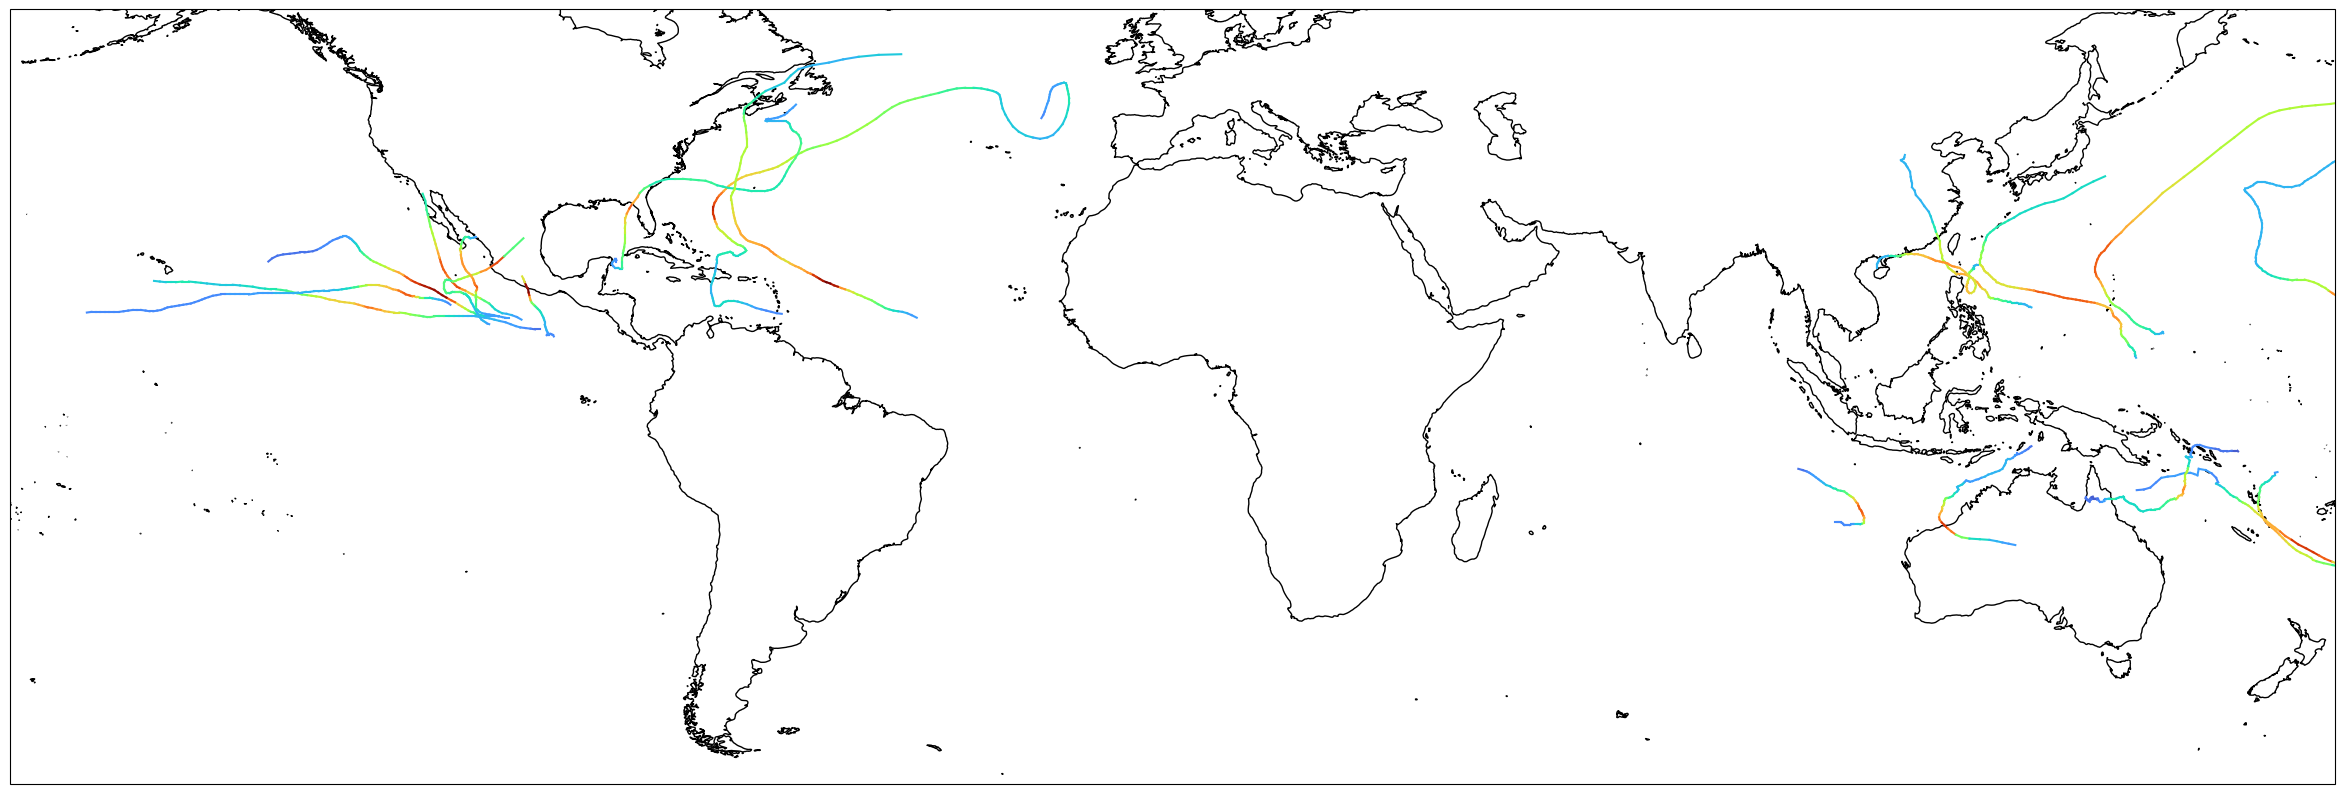

In [26]:
ax = plt.axes(projection=ccrs.PlateCarree())
plt.rcParams["figure.figsize"] = (30,15)
cmap = cmp.get_cmap('turbo')
year_index = 43
print(len(annual_hurricane_list))
for i in range(len(annual_hurricane_list[year_index]["storm"])):
    track_lons = np.array(annual_hurricane_list[year_index]["lon"][i])
    track_lats = np.array(annual_hurricane_list[year_index]["lat"][i])

    if np.nanmax(annual_hurricane_list[year_index]["wmo_wind"][i]) >= 96:
        print(track_lats)
        colors = annual_hurricane_list[year_index]["wmo_wind"][i]/np.nanmax(annual_hurricane_list[year_index]["wmo_wind"])
        colors = np.array(colors)
        prev_color = colors[0]
        print(colors[:10])
        for j in range(len(colors)):
            if np.isnan(colors[j]):
                print("hi")
                colors[j] = prev_color
            prev_color = colors[j]
        #print(colors[:10])
        plot_var_col(track_lons, track_lats,colors = cmap(colors))
    #plt.plot(np.array(modern_hurricanes["lon"][i]), np.array(modern_hurricanes["lat"][i]), color = "blue")
ax.coastlines(resolution='50m')
ax.set_extent([-180,180, -60,60])

In [151]:
np.linspace(start_year, end_year - 1, end_year - start_year)

array([1950., 1951., 1952., 1953., 1954., 1955., 1956., 1957., 1958.,
       1959., 1960., 1961., 1962., 1963., 1964., 1965., 1966., 1967.,
       1968., 1969., 1970., 1971., 1972., 1973., 1974., 1975., 1976.,
       1977., 1978., 1979., 1980., 1981., 1982., 1983., 1984., 1985.,
       1986., 1987., 1988., 1989., 1990., 1991., 1992., 1993., 1994.,
       1995., 1996., 1997., 1998., 1999., 2000., 2001., 2002., 2003.,
       2004., 2005., 2006., 2007., 2008., 2009., 2010., 2011., 2012.,
       2013., 2014., 2015., 2016., 2017., 2018., 2019., 2020., 2021.,
       2022., 2023., 2024.])

In [ ]:
i = 0
for annual_data in annual_hurricane_list:
    
    ax = plt.axes(projection=ccrs.PlateCarree())
    plt.rcParams["figure.figsize"] = (30,15)
    cmap = cmp.get_cmap('turbo')
    for i in range(len(annual_data["storm"])):
        track_lons = np.array(annual_data["lon"][i])
        track_lats = np.array(annual_data["lat"][i])
        if np.nanmax(annual_data["wmo_wind"][i]) >= 96:
            plot_var_col(track_lons, track_lats, colors = cmap(annual_data["wmo_wind"][i]/np.nanmax(annual_data["wmo_wind"])))
            plt.scatter(track_lons[0], track_lats[0], colors = np.max())
        #plt.plot(np.array(modern_hurricanes["lon"][i]), np.array(modern_hurricanes["lat"][i]), color = "blue")
    ax.coastlines(resolution='50m')
    ax.set_extent([-180,180, -60,60])
    plt.savefig("annualmaps/hurricanes" + str(i))
    i = i+1
    plt.clf()

In [ ]:
start_year = 1900
end_year = 2025 #python rules
annual_hurricane_list = []
for year in range(start_year, end_year):
    annual_data = date_range(pd.to_datetime(str(year) + '-01-01'), pd.to_datetime(str(year) + '-12-31'), hurricanes)
    annual_hurricane_list.append(annual_data)
